In [10]:
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df= pd.read_csv('../data/procesada/combined_data.csv', index_col=0, parse_dates=True)
df.head()

,TR1.Ambient temperature_resampleado,TR1.Bubbling temperature_resampleado,TR1.Hot spot temperature_resampleado,TR1.Load current LV Ph 2_resampleado,TR1.Moisture of insulation paper_resampleado,TR1.Oil temperature OLTC 1_resampleado,TR1.Power (apparent power) 1m_resampleado,TR1.Tap Position_resampleado,TR1.Top oil temperature_resampleado
Timestamp,,,,,,,,,
2024-09-09 22:00:00,27.650000,182.022125,46.909760,894.668196,0.539988,52.500000,NaN,6.000000,37.166667
2024-09-09 22:30:00,26.799999,181.887016,62.881384,913.560304,0.542497,52.483334,NaN,6.857143,46.333333
2024-09-09 23:00:00,26.400000,181.751369,62.968920,927.463050,0.545007,52.466667,NaN,7.714286,55.500000
2024-09-09 23:30:00,26.000000,181.615723,63.195588,940.645803,0.547516,52.450001,NaN,8.571429,55.433333
2024-09-10 00:00:00,25.299999,181.410370,62.843075,930.434031,0.552483,52.433334,NaN,9.428571,55.366666


In [18]:
df_combined = df.copy()
# Renombrar columnas para mejorar legibilidad
df_combined.rename(columns={
    'TR1.Ambient temperature_resampleado': 'temperature_ambiente',
    'TR1.Bubbling temperature_resampleado': 'temperatura_burbujeo',
    'TR1.Hot spot temperature_resampleado': 'temperatura_punto_caliente',
    'TR1.Load current LV Ph 2_resampleado': 'corriente_carga',
    'TR1.Moisture of insulation paper_resampleado': 'humedad_papel_aislante',
    'TR1.Oil temperature OLTC 1_resampleado': 'temperatura_aceite_OLTC',
    'TR1.Power (apparent power) 1m_resampleado': 'potencia_aparente',
    'TR1.Tap Position_resampleado': 'posicion_tap',
    'TR1.Top oil temperature_resampleado': 'temperatura_aceite',
}, inplace=True)
df_combined.head()

,temperature_ambiente,temperatura_burbujeo,temperatura_punto_caliente,corriente_carga,humedad_papel_aislante,temperatura_aceite_OLTC,potencia_aparente,posicion_tap,temperatura_aceite
Timestamp,,,,,,,,,
2024-09-09 22:00:00,27.650000,182.022125,46.909760,894.668196,0.539988,52.500000,NaN,6.000000,37.166667
2024-09-09 22:30:00,26.799999,181.887016,62.881384,913.560304,0.542497,52.483334,NaN,6.857143,46.333333
2024-09-09 23:00:00,26.400000,181.751369,62.968920,927.463050,0.545007,52.466667,NaN,7.714286,55.500000
2024-09-09 23:30:00,26.000000,181.615723,63.195588,940.645803,0.547516,52.450001,NaN,8.571429,55.433333
2024-09-10 00:00:00,25.299999,181.410370,62.843075,930.434031,0.552483,52.433334,NaN,9.428571,55.366666


In [44]:
df_combined2= pd.read_csv('../data/procesada/combined_data_ready.csv', index_col=0, parse_dates=True)
df_combined2.head()
df_combined2.isnull().sum()

temperatura_ambiente          0
temperatura_burbujeo          0
temperatura_punto_caliente    0
corriente_carga               0
humedad_papel_aislante        0
temperatura_aceite_OLTC       0
potencia_aparente             0
posicion_tap                  0
temperatura_aceite            0
dtype: int64

In [ ]:
df_combined2.dropna(inplace=True)
df_combined2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12617 entries, 2024-09-10 04:00:00 to 2025-05-31 00:00:00
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temperature_ambiente        12617 non-null  float64
 1   temperatura_burbujeo        12617 non-null  float64
 2   temperatura_punto_caliente  12617 non-null  float64
 3   corriente_carga             12617 non-null  float64
 4   humedad_papel_aislante      12617 non-null  float64
 5   temperatura_aceite_OLTC     12617 non-null  float64
 6   potencia_aparente           12617 non-null  float64
 7   posicion_tap                12617 non-null  float64
 8   temperatura_aceite          12617 non-null  float64
dtypes: float64(9)
memory usage: 985.7 KB


In [21]:
df_combined.describe()


,temperature_ambiente,temperatura_burbujeo,temperatura_punto_caliente,corriente_carga,humedad_papel_aislante,temperatura_aceite_OLTC,potencia_aparente,posicion_tap,temperatura_aceite
count,12617.000000,12617.000000,12617.000000,12617.000000,12617.000000,12617.000000,12617.000000,12617.000000,12617.000000
mean,26.350623,173.581297,54.047037,769.311394,0.740065,44.181999,30.945599,9.005327,48.633046
std,5.655213,7.013004,8.211919,190.645216,0.182884,6.414702,7.714454,1.734542,6.351264
min,7.100000,83.906601,23.167637,337.367235,0.349967,19.350000,0.000000,1.000000,21.400000
25%,22.300000,168.837959,47.765499,631.448526,0.600801,39.350000,25.253134,8.000000,43.866666
50%,26.100000,172.982414,53.322334,727.007926,0.718458,44.050001,29.220271,9.000000,48.599998
75%,30.275000,177.293549,59.889496,889.971137,0.863388,48.799999,35.832904,10.100000,53.100000
max,40.799999,194.108917,79.805921,1467.050781,1.345412,61.900002,60.733223,17.000000,67.000000


In [22]:
df_combined.dtypes


temperature_ambiente          float64
temperatura_burbujeo          float64
temperatura_punto_caliente    float64
corriente_carga               float64
humedad_papel_aislante        float64
temperatura_aceite_OLTC       float64
potencia_aparente             float64
posicion_tap                  float64
temperatura_aceite            float64
dtype: object

In [1]:
def boxplots(df):
    # Obtener las columnas numéricas
    cols_num = df.select_dtypes(include=['number']).columns.tolist()
    num_cols = 2  # Número de columnas en el subplot
    num_rows = (len(cols_num) + num_cols - 1) // num_cols
    
    # Crear subgráficos
    fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)
    ax = ax.flatten()
    
    # Generar gráficos individuales
    for i, col in enumerate(cols_num):
        sns.boxplot(x=df[col], ax=ax[i])
        ax[i].set_title(col)
    
    # Ocultar subplots vacíos si hay un número impar de gráficos
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])
    
    plt.show()

In [7]:
import pandas as pd
df=pd.read_parquet("../data/bronze/transformador/tap_position.parquet")
df.describe()

,value
count,5762.000000
mean,9.309962
std,1.752247
min,0.000000
25%,8.000000
50%,10.000000
75%,10.000000
max,17.000000


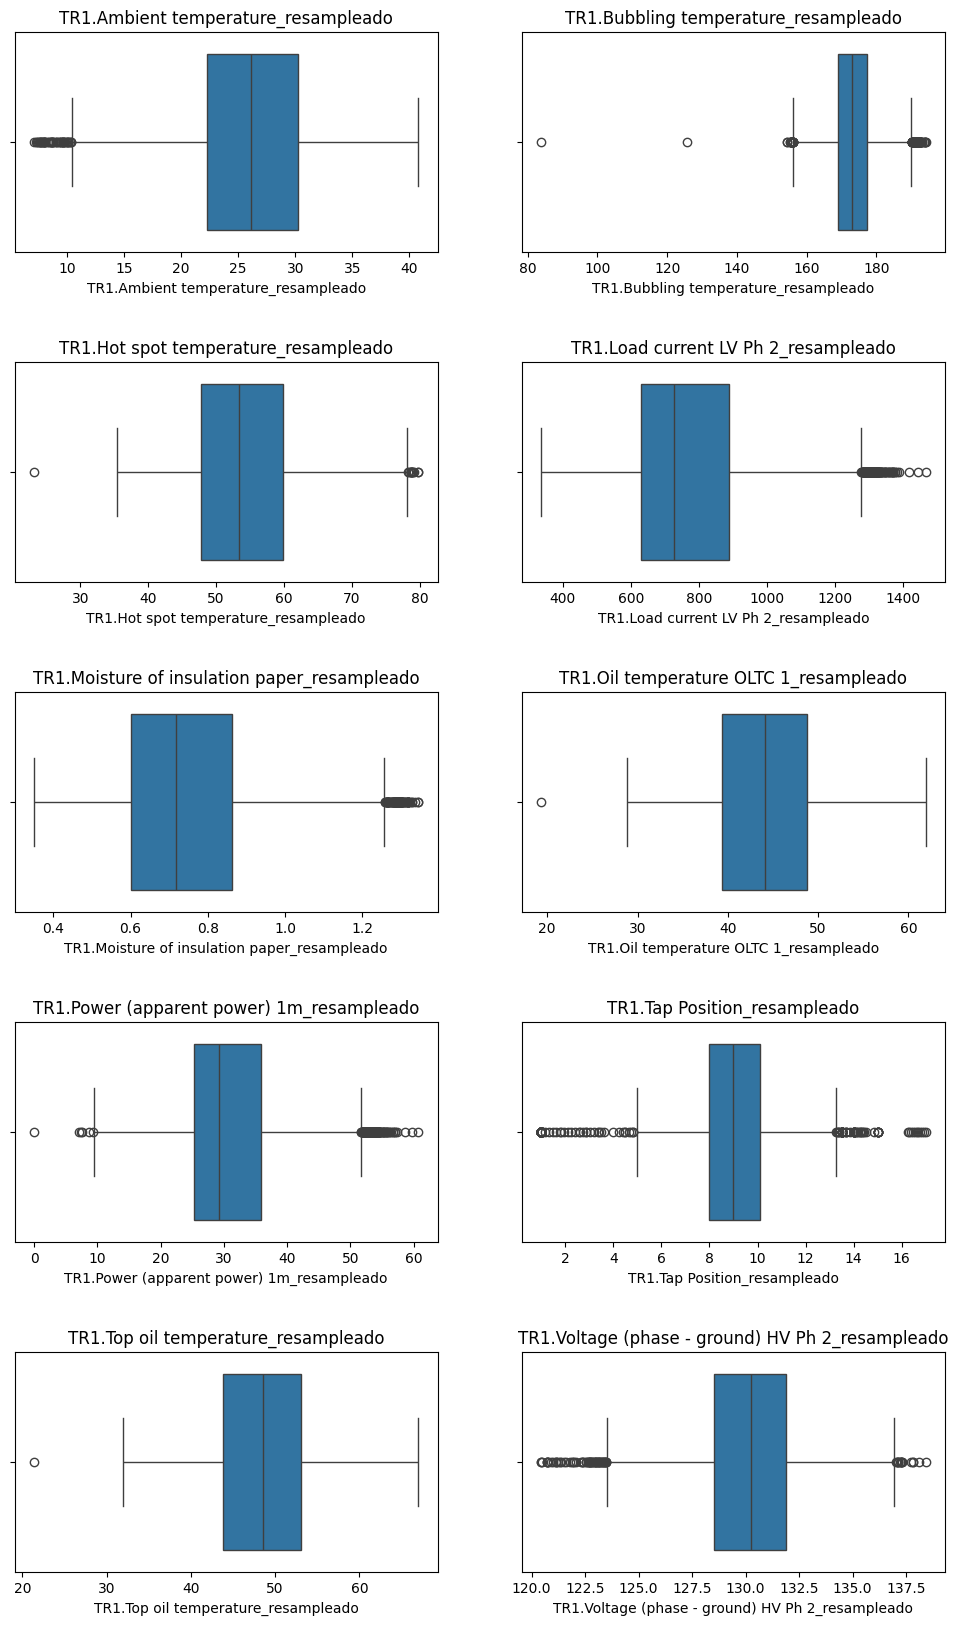

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
voltaje=pd.read_csv("../data/procesada/combined_data.csv")
boxplots(voltaje)

In [12]:
def filtrar_outliers_iqr_con_rango(df):
    """
    Filtra outliers de cada variable numérica usando el método IQR y muestra
    los rangos mínimo y máximo después de filtrar.
    """
    df_filtrado = df.copy()
    numeric_cols = df.select_dtypes(include='number').columns

    rangos = {}

    for col in numeric_cols:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_filtrado = df_filtrado[(df_filtrado[col] >= lower_bound) & (df_filtrado[col] <= upper_bound)]

        # Guardar el rango limpio
        rango_min = df_filtrado[col].min()
        rango_max = df_filtrado[col].max()
        rangos[col] = (rango_min, rango_max)

    return df_filtrado, rangos

# Uso:
dfclean, rangos = filtrar_outliers_iqr_con_rango(voltaje)

# Mostrar rangos
for col, (min_val, max_val) in rangos.items():
    print(f"Variable: {col} -> Min: {min_val:.2f}, Max: {max_val:.2f}")


Variable: TR1.Ambient temperature_resampleado -> Min: 10.40, Max: 40.80
Variable: TR1.Bubbling temperature_resampleado -> Min: 156.31, Max: 189.99
Variable: TR1.Hot spot temperature_resampleado -> Min: 36.58, Max: 74.70
Variable: TR1.Load current LV Ph 2_resampleado -> Min: 337.37, Max: 1264.21
Variable: TR1.Moisture of insulation paper_resampleado -> Min: 0.41, Max: 1.24
Variable: TR1.Oil temperature OLTC 1_resampleado -> Min: 29.10, Max: 59.37
Variable: TR1.Power (apparent power) 1m_resampleado -> Min: 14.58, Max: 50.69
Variable: TR1.Tap Position_resampleado -> Min: 5.00, Max: 13.00
Variable: TR1.Top oil temperature_resampleado -> Min: 33.70, Max: 62.90
Variable: TR1.Voltage (phase - ground) HV Ph 2_resampleado -> Min: 123.62, Max: 136.93


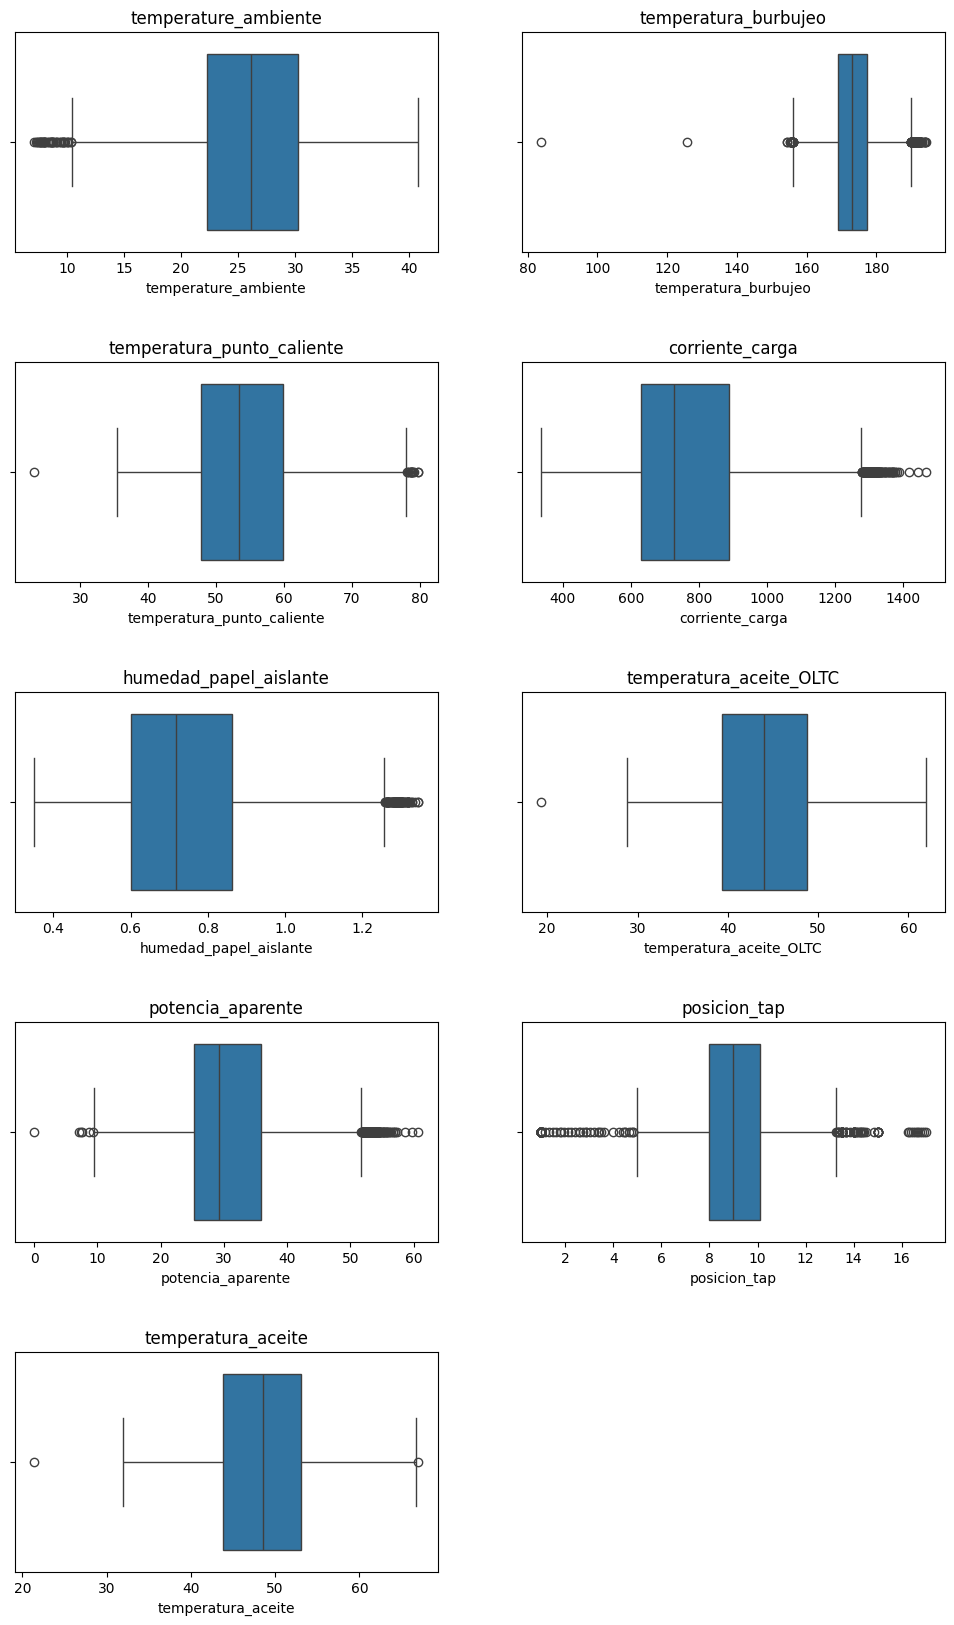

In [10]:
boxplots(df_combined)

In [23]:
print (f'Tamanio del set despues de eliminarl el regitro de edades {df_combined.shape}')

#Filtrar por valores atípicos

df_combined = df_combined[(df_combined['temperatura_burbujeo'] > 140) &
                           (df_combined['temperatura_punto_caliente'] > 35) &
                           (df_combined['corriente_carga'] < 1250)]
df_combined.drop_duplicates(inplace=True)

print (f'Tamanio del set despues de eliminarl el regitro de edades {df_combined.shape}')

Tamanio del set despues de eliminarl el regitro de edades (12617, 9)
Tamanio del set despues de eliminarl el regitro de edades (12262, 9)


In [37]:
import pandas as pd
aaa=pd.read_csv('../data/procesada/combined_data_ready.csv', index_col=0, parse_dates=True)
aaa.head()
aaa.shape


(12262, 9)

In [36]:
print(aaa.isnull().sum())


temperatura_ambiente          0
temperatura_burbujeo          0
temperatura_punto_caliente    0
corriente_carga               0
humedad_papel_aislante        0
temperatura_aceite_OLTC       0
potencia_aparente             0
posicion_tap                  0
temperatura_aceite            0
dtype: int64


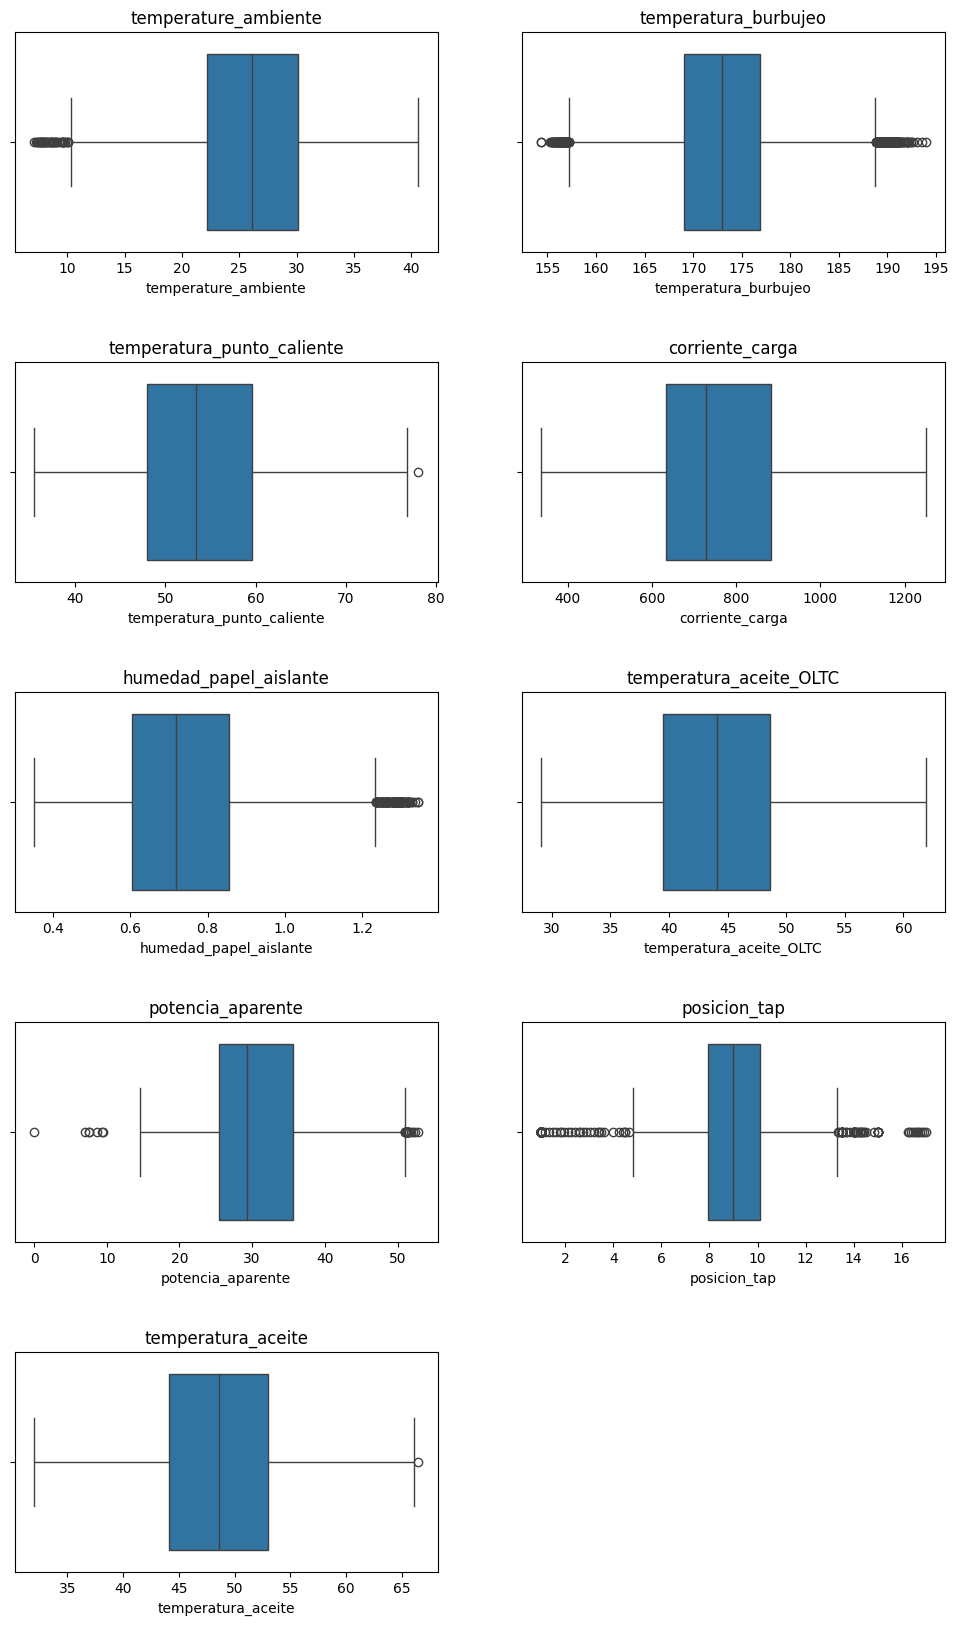

In [12]:
boxplots(df_combined)

In [38]:
df_combined.to_csv('../data/procesada/combined_data_cleaned.csv')


In [41]:
df_bd= pd.read_csv('../data/procesada/combined_data_ready.csv', index_col=0, parse_dates=True)
df_bd.head()

,temperatura_ambiente,temperatura_burbujeo,temperatura_punto_caliente,corriente_carga,humedad_papel_aislante,temperatura_aceite_OLTC,potencia_aparente,posicion_tap,temperatura_aceite
Timestamp,,,,,,,,,
2024-09-10 04:00:00,26.500000,178.928398,58.642727,733.840371,0.587974,51.025001,30.489245,11.0,53.500
2024-09-10 04:30:00,26.733334,178.534617,57.973421,708.433386,0.597363,50.700001,29.445180,11.0,53.225
2024-09-10 05:00:00,26.316667,176.250397,57.304115,684.065427,0.610628,50.375001,28.426628,11.0,52.950
2024-09-10 05:30:00,25.900000,176.001775,57.072746,667.426629,0.623892,50.050001,27.773739,11.0,52.675
2024-09-10 06:00:00,26.000000,175.753153,56.585251,651.429854,0.637156,49.725001,27.144727,11.0,52.400


In [2]:
import pandas as pd
sucia=pd.read_csv("../data/procesada/combined_data.csv", index_col=0, parse_dates=True)
sucia.head()

,TR1.Ambient temperature_resampleado,TR1.Bubbling temperature_resampleado,TR1.Hot spot temperature_resampleado,TR1.Load current LV Ph 2_resampleado,TR1.Moisture of insulation paper_resampleado,TR1.Oil temperature OLTC 1_resampleado,TR1.Power (apparent power) 1m_resampleado,TR1.Tap Position_resampleado,TR1.Top oil temperature_resampleado,TR1.Voltage (phase - ground) HV Ph 2_resampleado
Timestamp,,,,,,,,,,
2024-09-09 22:00:00,27.650000,182.022125,46.909760,894.668196,0.539988,52.500000,NaN,6.000000,37.166667,128.329028
2024-09-09 22:30:00,26.799999,181.887016,62.881384,913.560304,0.542497,52.483334,NaN,6.857143,46.333333,128.646620
2024-09-09 23:00:00,26.400000,181.751369,62.968920,927.463050,0.545007,52.466667,NaN,7.714286,55.500000,129.106956
2024-09-09 23:30:00,26.000000,181.615723,63.195588,940.645803,0.547516,52.450001,NaN,8.571429,55.433333,129.221010
2024-09-10 00:00:00,25.299999,181.410370,62.843075,930.434031,0.552483,52.433334,NaN,9.428571,55.366666,129.704919


In [ ]:
valor=pd.read_csv("../data/formateada/TR1.Power (apparent power) 1m_resampleado.csv")
valor.head()

,Timestamp,temp
0,2024-09-10 04:00:00,30.489245
1,2024-09-10 04:30:00,29.445180
2,2024-09-10 05:00:00,28.426628
3,2024-09-10 05:30:00,27.773739
4,2024-09-10 06:00:00,27.144727
